# 서포트 벡터 머신

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

 

matplotlib.rc("font",family="NanumGothic")

In [18]:
df_raw = pd.read_csv("./Data/3. Big Data 분석/HMEQ.csv",engine='python')

In [19]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [20]:
df_raw.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,3748.000000,3748.000000,3748.000000,3734.000000,3543.000000,3748.000000,3718.000000,3711.000000,3692.000000,3748.000000,3748.000000
mean,0.092049,19483.564568,75117.309232,106791.045795,9.130398,0.161153,0.269769,180.873315,1.028982,21.649680,34.130636
std,0.289134,11404.260479,44861.197182,54374.991076,7.637535,0.602606,0.790790,82.507487,1.555433,9.557532,8.372096
min,0.000000,1700.000000,4641.000000,21144.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.838118
25%,0.000000,12000.000000,47843.000000,70238.000000,3.000000,0.000000,0.000000,118.625764,0.000000,15.000000,29.397564
50%,0.000000,17100.000000,66581.000000,93676.500000,7.000000,0.000000,0.000000,177.085845,0.000000,21.000000,35.024732
75%,0.000000,23900.000000,92353.750000,122423.750000,14.000000,0.000000,0.000000,230.272746,2.000000,26.000000,39.147195
max,1.000000,89900.000000,399412.000000,512650.000000,41.000000,10.000000,10.000000,1168.233561,13.000000,71.000000,203.312149


In [35]:
df_raw["JOB"].fillna("Other",inplace =True)
df_raw.fillna(df_raw.mean(),inplace=True)

In [36]:
df_raw_dummy = pd.get_dummies(df_raw)

In [37]:
df_raw_y=df_raw_dummy["BAD"]
df_raw_x=df_raw_dummy.drop("BAD",axis=1,inplace=False)

In [38]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x ,df_raw_y, test_size=0.3,random_state=1234)

In [39]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
print("Accuracy on training set :{:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set :{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set :0.908
Accuracy on test set :0.908


In [41]:
svm_uncustomized

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
train_accuracy = []
test_accuracy =[]
para_c = [10 **c for c in range(-2,2)]
for v_C in para_c:
    svm = SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

In [43]:
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"]=para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["TestAccuracy"]=test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.909,0.908


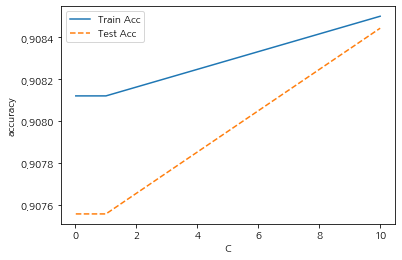

In [44]:
plt.plot(para_c,train_accuracy,linestyle='-',label="Train Acc")
plt.plot(para_c,test_accuracy,linestyle='--',label="Test Acc")
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

In [45]:
C=1

In [46]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

 

#gamma:규제(0.01, 0.1, 1, 10)
para_gamma=[10**gamma for gamma in range(-2,2)]

 

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma, C=0.1, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

 

# 데이터 테이블로 저장    
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['TestAccuracy']=test_accuracy

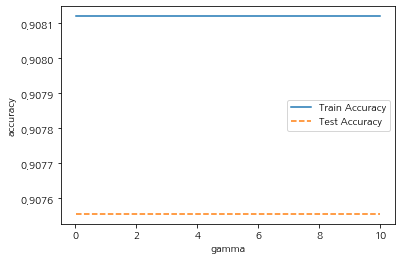

In [47]:
#Gamma별 정확도 테이블
df_accuracy_gamma.round(4)

 

# 모델 정확도 그래프 확인
plt.plot(para_gamma, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_gamma, test_accuracy, linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('gamma')
plt.legend()

In [48]:
#변수명 저장
v_feature_name=df_train_x.columns

 

#StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

 

#데이터 분할
df_scaled_train_x, df_scaled_test_x=train_test_split(df_scaled,
                                                test_size=0.3,
                                                random_state=1234)
print("train data X size:{}".format(df_scaled_train_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size:(2623, 18)
test data X size:(1125, 18)


In [49]:
svm_scaled=SVC(random_state=1234)

 

svm_scaled.fit(df_scaled_train_x, df_train_y)

 

print("Accuracy on training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x,df_train_y)))

 

print('Accuracy on test set:{:.3f}'.format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set:0.944
Accuracy on test set:0.935


In [50]:
#train 및 test 정확도 결과 저장용
train_accuracy=[]
test_accuracy=[]

 

#c 규제(0.01, 0.1, 1, 10)
para_c=[10**c for c in range(-2,2)]

 

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma, C=0.1, random_state=1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))

# 데이터 테이블로 저장    
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['TestAccuracy']=test_accuracy

In [51]:
#C별 정확도 테이블
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.908,0.908
1,0.10,0.908,0.908
2,1.00,0.908,0.908
3,10.00,0.909,0.908


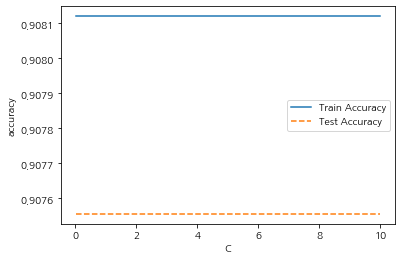

In [52]:
# 모델 정확도 그래프 확인
plt.plot(para_c, train_accuracy, linestyle='-',label='Train Accuracy')
plt.plot(para_c, test_accuracy, linestyle='--',label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()

In [53]:
train_accuracy=[];test_accuracy=[]
para_gamma=[10**gamma for gamma in range(-2,2)]

 

for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma, C=1, random_state=1234)
    svm.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    

 

df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma["gamma"]=para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["TestAccuracy"]=test_accuracy

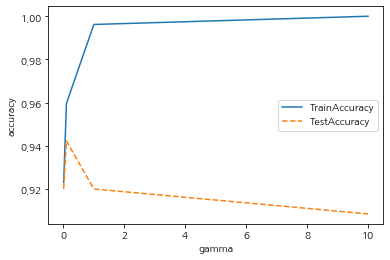

In [54]:
df_accuracy_gamma.round(3)

 

plt.plot(para_gamma,train_accuracy,linestyle="-",label="TrainAccuracy")
plt.plot(para_gamma,test_accuracy,linestyle="--",label="TestAccuracy")
plt.ylabel("accuracy");plt.xlabel("gamma")
plt.legend()

 

#임의로 지정
gamma=0.1

In [55]:
svc_final=SVC(gamma=0.1,C=1,random_state=1234)
svc_final.fit(df_scaled_train_x, df_train_y)

 

y_pred=svc_final.predict(df_scaled_test_x)

 

print("Accuracy on training set:{:.3f}".format(svc_final.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}\n".format(svc_final.score(df_scaled_test_x,df_test_y)))
print("Accuracy matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.960
Accuracy on test set:0.942

Accuracy matrix:
[[1021    0]
 [  65   39]]


In [56]:
estimator=SVC(random_state=1234)
param_grid={"C":para_c,"gamma":para_gamma}

 

grid_rf=GridSearchCV(estimator,param_grid,scoring="accuracy",n_jobs=-1)
grid_rf.fit(df_scaled_train_x,df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

best parameter:
{'C': 10, 'gamma': 0.1}

best score:
0.96


# 인공신경망

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [2]:
df_raw = pd.read_csv('./Data/3. Big Data 분석/HMEQ.csv')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [4]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [5]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [6]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [7]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy.drop('BAD',axis=1), df_raw_dummy['BAD'], test_size=0.3)

In [8]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(nn_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 0.910
Accuracy on test set: 0.908


/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [9]:
nn_uncustomized

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1234, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [10]:
train_accuracy = []
test_accuracy = []

para_hidden = [20 * hidden for hidden in range(1, 9)]
for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=v_hidden, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['HiddenLayer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

In [11]:
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.907,0.910
1,40,0.903,0.906
2,60,0.909,0.912
3,80,0.906,0.908
4,100,0.910,0.908
5,120,0.887,0.879
6,140,0.909,0.912
7,160,0.908,0.911


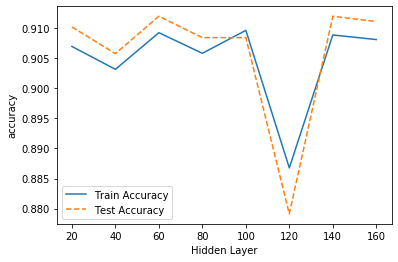

In [12]:
plt.plot(para_hidden, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()

In [13]:
train_accuracy = []
test_accuracy = []

para_function = ['logistic', 'tanh', 'relu']
for v_function in para_function:
    nn = MLPClassifier(activation=v_function, random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.907,0.910
1,tanh,0.907,0.910
2,relu,0.910,0.908


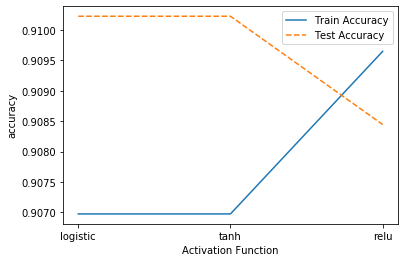

In [16]:
plt.plot(para_function, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Activation Function')
plt.legend()

In [57]:
v_feature_name=df_train_x.columns

 

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,-1.559587,-0.993626,-1.224910,-0.017563,-0.267462,-0.342558,-0.967342,-0.018776,-1.428350,0.356347,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
1,-1.550817,-1.039240,-1.174897,0.251809,-0.267462,-0.342558,-1.122053,-0.666629,-1.428350,0.329025,-1.548549,1.548549,-0.381873,-0.446497,1.207355,-0.574064,-0.131804,-0.189556
2,-1.506968,0.607570,0.260973,-0.960364,-0.267462,-0.342558,-1.094930,-0.666629,-0.905133,-0.303684,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556
3,-1.498198,-0.897428,-1.093133,0.386495,-0.267462,-0.342558,-1.344679,-0.018776,-0.067985,0.493725,-1.548549,1.548549,2.618672,-0.446497,-0.828257,-0.574064,-0.131804,-0.189556
4,-1.498198,0.520156,0.191721,-0.690992,-0.267462,-0.342558,-1.060586,-0.666629,-0.905133,-0.531456,-1.548549,1.548549,-0.381873,2.239654,-0.828257,-0.574064,-0.131804,-0.189556


In [58]:
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)

 

print("train data X size:{}".format(df_train_x.shape))
print("test data X size:{}".format(df_test_x.shape))

train data X size:(2623, 18)
test data X size:(1125, 18)


In [59]:
nn_scaled=MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x,df_train_y)

 

print("Accuracy on training set:{:.3f}".format(nn_scaled.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on training set:0.971
Accuracy on test set:0.943


/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [60]:
train_accuracy=[]
test_accuracy=[]

 

para_hidden=[20*hidden for hidden in range(1,11)]

 


for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_hidden=pd.DataFrame()
df_accuracy_hidden["HiddenLayer"]=para_hidden
df_accuracy_hidden["TrainAccuracy"]=train_accuracy
df_accuracy_hidden["TestAccuracy"]=test_accuracy

 

df_accuracy_hidden.round(3)

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.975,0.948
1,40,0.994,0.952
2,60,0.999,0.949
3,80,1.000,0.955
4,100,1.000,0.953
5,120,1.000,0.951
6,140,1.000,0.955
7,160,1.000,0.955
8,180,1.000,0.957
9,200,1.000,0.956


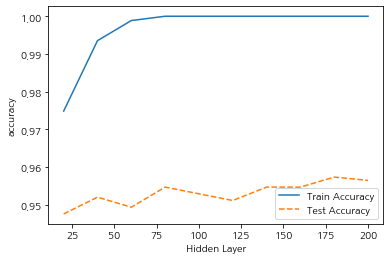

In [61]:
plt.plot(para_hidden, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Hidden Layer')
plt.legend()

In [62]:
hidden_layer=80

In [63]:
train_accuracy = []
test_accuracy = []

 

 

 

para_function = ['logistic', 'tanh', 'relu']
for v_function in para_function:
    nn = MLPClassifier(activation=v_function,hidden_layer_sizes=(80,80), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

 

df_accuracy_function.round(3)

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.908,0.908
1,tanh,0.908,0.908
2,relu,0.911,0.911


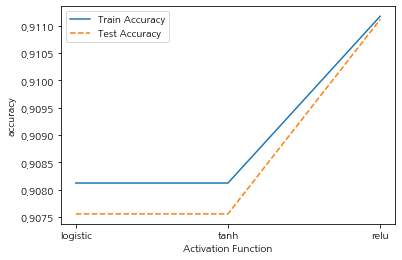

In [64]:
plt.plot(para_function, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_function, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Activation Function')
plt.legend()

In [65]:
activation="relu"

In [66]:
train_accuracy = []
test_accuracy = []

 

 

 

para_solver = ['lbfgs', 'sgd', 'adam']
for v_solver in para_solver:
    nn = MLPClassifier(solver=v_solver,activation="relu",hidden_layer_sizes=(80,80), random_state=1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x, df_train_y))
    test_accuracy.append(nn.score(df_test_x, df_test_y))
    
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy

 

df_accuracy_solver.round(3)

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,0.889,0.884
1,sgd,0.908,0.908
2,adam,0.911,0.911


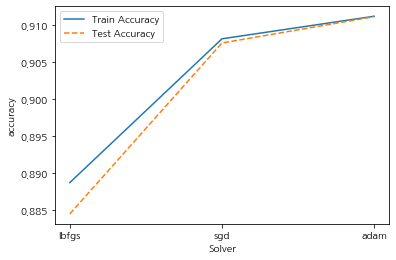

In [67]:
plt.plot(para_solver, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_solver, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Solver')
plt.legend()

In [68]:
#결과는 adam이 아닌데...

 

train_accuracy=[]
test_accuracy=[]

 

para_batch=[20*batch for batch in range(1,10)]

 


for v_batch in para_batch:
    nn = MLPClassifier(batch_size=v_batch,solver="adam",activation="relu",hidden_layer_sizes=(80,80),random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_batch=pd.DataFrame()
df_accuracy_batch["Mini Batch"]=para_batch
df_accuracy_batch["TrainAccuracy"]=train_accuracy
df_accuracy_batch["TestAccuracy"]=test_accuracy

 

df_accuracy_batch.round(3)

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

,Mini Batch,TrainAccuracy,TestAccuracy
0,20,1.0,0.959
1,40,1.0,0.956
2,60,1.0,0.950
3,80,1.0,0.952
4,100,1.0,0.952
5,120,1.0,0.953
6,140,1.0,0.953
7,160,1.0,0.954
8,180,1.0,0.956


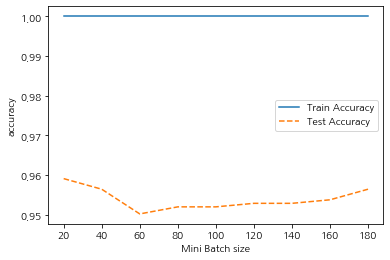

In [69]:
plt.plot(para_batch, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_batch, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Mini Batch size')
plt.legend()

In [70]:
nn_final = MLPClassifier(batch_size=100,solver="adam",activation="relu",hidden_layer_sizes=(80,80),random_state=1234)
nn_final.fit(df_scaled_train_x,df_train_y)

 

y_pred=nn_final.predict(df_scaled_test_x)

 


print("Accuracy on training set:{:.3f}".format(nn_final.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}\n".format(nn_final.score(df_scaled_test_x,df_test_y)))

 

print("Accuracy matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:1.000
Accuracy on test set:0.952

Accuracy matrix:
[[1018    3]
 [  51   53]]


# KNN

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [87]:
df_raw = pd.read_csv('./Data/3. Big Data 분석/HMEQ.csv')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [88]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [89]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [90]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [91]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy.drop('BAD',axis=1), df_raw_dummy['BAD'], test_size=0.3)

In [101]:
train_accuracy = []
test_accuracy = []

 


para_n_neighbors = [i for i in range(1, 16)]
for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy

 

df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.869
1,2,0.931,0.908
2,3,0.933,0.901
3,4,0.920,0.908
4,5,0.920,0.904
5,6,0.917,0.909
6,7,0.917,0.903
7,8,0.913,0.909
8,9,0.914,0.909
9,10,0.911,0.909


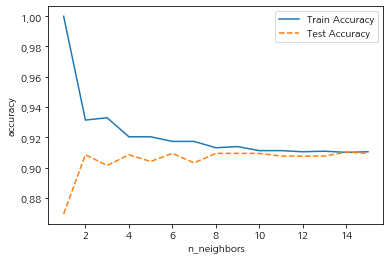

In [102]:
plt.plot(para_n_neighbors, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle='--', label='Test Accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_neighbors')
plt.legend()

In [103]:
n_neighbors=4

In [104]:
train_accuracy = []
test_accuracy = []

 


para_n_neighbors = [i for i in range(1,11)]*2

 

para_weights=(["uniform"])*10+(["distance"]*10)

 


for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors']=para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy

 

df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.869
1,2,uniform,0.931,0.908
2,3,uniform,0.933,0.901
3,4,uniform,0.920,0.908
4,5,uniform,0.920,0.904
5,6,uniform,0.917,0.909
6,7,uniform,0.917,0.903
7,8,uniform,0.913,0.909
8,9,uniform,0.914,0.909
9,10,uniform,0.911,0.909


In [105]:
df_accuracy_weights_pivot=df_accuracy_weights.pivot(index="Neighbors",columns="Weights",values=["TrainAccuracy","TestAccuracy"])

 

df_accuracy_weights_pivot

 

level0=df_accuracy_weights_pivot.columns.get_level_values(0)
level1=df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns=level0+"_"+level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.869333,0.869333
2,1.0,0.931376,0.869333,0.908444
3,1.0,0.932901,0.892444,0.901333
4,1.0,0.920320,0.899556,0.908444
5,1.0,0.920320,0.899556,0.904000


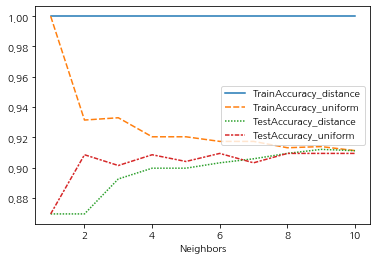

In [106]:
sns.lineplot(data=df_accuracy_weights_pivot)

In [107]:
weights="uniform"

In [114]:
train_accuracy=[]
test_accuracy=[]

 


para_n_neighbors=[i for i in range(1,11)]*3

 

para_metric = ["minkowski"]*10 + ["euclidean"]*10 + ["manhattan"]*10

 

for (v_neighbors,v_metric) in zip(para_n_neighbors,para_metric):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,metric=v_metric,weights="uniform")
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    test_accuracy.append(knn.score(df_test_x,df_test_y))
    
df_accuracy_metric=pd.DataFrame()
df_accuracy_metric["Neighbors"]=para_n_neighbors
df_accuracy_metric["Metric"]=para_metric
df_accuracy_metric["TrainAccuracy"]=train_accuracy
df_accuracy_metric["TestAccuracy"]=test_accuracy

 


df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,minkowski,0.911,0.909
1,2,minkowski,0.911,0.909
2,3,minkowski,0.911,0.909
3,4,minkowski,0.911,0.909
4,5,minkowski,0.911,0.909
5,6,minkowski,0.911,0.909
6,7,minkowski,0.911,0.909
7,8,minkowski,0.911,0.909
8,9,minkowski,0.911,0.909
9,10,minkowski,0.911,0.909


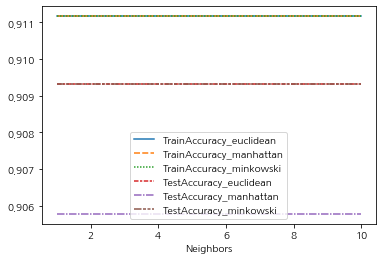

In [115]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index="Neighbors",columns="Metric",values=["TrainAccuracy","TestAccuracy"])

 

level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data=df_accuracy_metric_pivot)

In [116]:
knn_model = KNeighborsClassifier(n_neighbors =4,weights = "uniform",metric="euclidean")
knn_model.fit(df_train_x,df_train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [117]:
y_pred = knn_model.predict(df_test_x)

print("Accuracy on training set:{:.3f}".format(knn_model.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}\n".format(knn_model.score(df_test_x,df_test_y)))
print("Accuracy matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

Accuracy on training set:0.920
Accuracy on test set:0.908

Accuracy matrix:
[[1019    3]
 [ 100    3]]


# 모델평가

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, roc_auc_score, auc, roc_curve

In [120]:
df_raw = pd.read_csv('./Data/3. Big Data 분석/HMEQ.csv')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [121]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [122]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [123]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [124]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_dummy.drop('BAD',axis=1), df_raw_dummy['BAD'], test_size=0.3)

In [125]:
print("train data X size:{}".format(df_train_x.shape))
print("test data X size:{}".format(df_test_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(2623, 18)
test data X size:(1125, 18)
train data Y size:(2623,)
test data Y size:(1125,)


In [132]:
model = ['DecisionTree', 'RandomForest', 'GradientBoosting', 'NeuralNet']

train_accuracy = []
test_accuracy = []
model_f1_score = []
model_auc = []

In [133]:
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_leaf=30)
dt_model.fit(df_train_x, df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

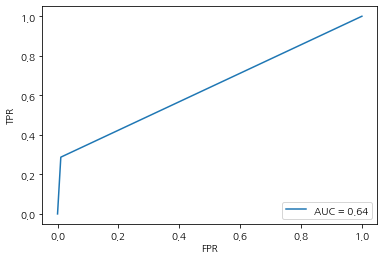

In [134]:
plt.plot(fpr, tpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [135]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [136]:
rf_model = RandomForestClassifier(min_samples_leaf=20, max_depth=4, n_estimators=100, random_state=1234)
rf_model.fit(df_train_x, df_train_y)

train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

y_pred = rf_model.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

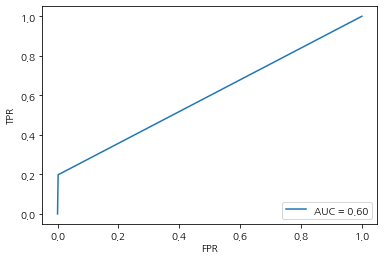

In [137]:
plt.plot(fpr, tpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [139]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [140]:
gb_final = GradientBoostingClassifier(min_samples_leaf=10, max_depth=4, n_estimators=100, random_state=1234, learning_rate=.1)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

y_pred = gb_final.predict(df_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

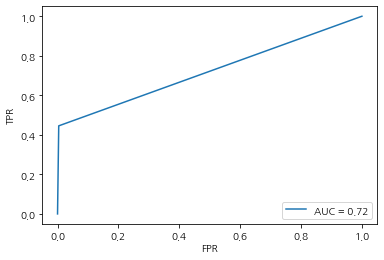

In [141]:
plt.plot(fpr, tpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [142]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [143]:
v_feature_names = df_train_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_dummy.drop("BAD", axis=1))
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_names)

In [144]:
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size=0.3, random_state=1234)
print('train data X size: {}'.format(df_scaled_train_x.shape))
print('test data Y size: {}'.format(df_scaled_test_x.shape))

train data X size: (2623, 18)
test data Y size: (1125, 18)


In [145]:
nn_model = MLPClassifier(hidden_layer_sizes=(80,80), activation='relu', solver='adam', random_state=1234)
nn_model.fit(df_scaled_train_x, df_train_y)

train_accuracy.append(nn_model.score(df_scaled_train_x, df_train_y))
test_accuracy.append(nn_model.score(df_scaled_test_x, df_test_y))

y_pred = nn_model.predict(df_scaled_test_x)

fpr, tpr, thresholds = roc_curve(df_test_y, y_pred)
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

/home/piai/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


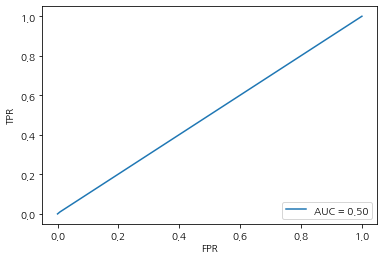

In [146]:
plt.plot(fpr, tpr, label='AUC = %0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [147]:
model_f1_score.append(f1_score(df_test_y, y_pred))

In [148]:
df_eval = pd.DataFrame(index=model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DecisionTree,0.928,0.926,0.411,0.638
RandomForest,0.927,0.926,0.325,0.598
GradientBoosting,0.972,0.947,0.600,0.721
NeuralNet,0.914,0.904,0.018,0.501


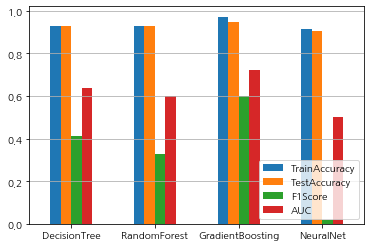

In [149]:
df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis='y')